```````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````

## AVOCADO PROJECT


```````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````

### Problem Statement:


    Avocado is a fruit consumed by people heavily in the United States

### Inspiration /Label 

    Task is to make a model by considering the data provided that can predict the Average Price.

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [43]:
data = pd.read_csv(r'C:\Users\91977\DataScienceProjects\Project_csv_files\avocado.csv')

In [44]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


- Dataset

    `Date` - The date of the observation
    
    `AveragePrice` - the average price of a single avocado
    
    `type` - conventional or organic
    
    `year` - the year
    
    `Region` - the city or region of the observation
    
    `Total Volume` - Total number of avocados sold
    
    `4046` - Total number of avocados with PLU 4046 sold
    
    `4225` - Total number of avocados with PLU 4225 sold
    
    `4770` - Total number of avocados with PLU 4770 sold

In [10]:
data.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [11]:
#Let's check the dataset dimension
data.shape

(18249, 14)

## Statistical Summary

Let's check whether we have null values in our dataset

In [12]:
data.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


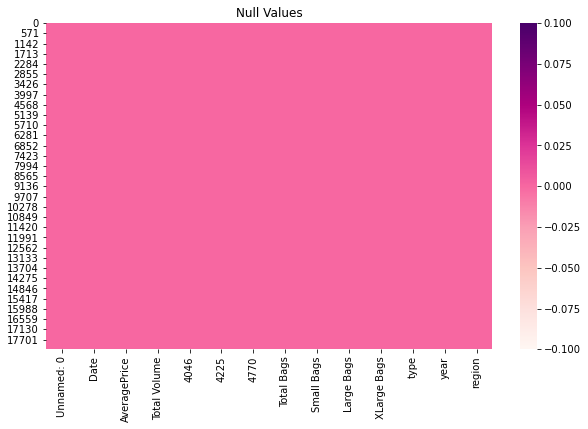

In [14]:
#Let's visualize to check the nullvalues in our dataset

plt.figure(figsize = [10,6])
sns.heatmap(data.isnull(),cmap ='RdPu')
plt.title('Null Values')
plt.show()

In [15]:
data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


- We could see that column "year" min,25%,50% of data is '0', only the rest 75% of range has some values

In [16]:
pd.set_option('display.max_rows',None)  #so that all rows can be displayed

In [17]:
(data['4046']==0).value_counts()

False    18007
True       242
Name: 4046, dtype: int64

In [18]:
(data['4225']==0).value_counts()

False    18188
True        61
Name: 4225, dtype: int64

In [19]:
(data['4770']==0).value_counts()

False    12752
True      5497
Name: 4770, dtype: int64

In [20]:
(data['4046']==0).value_counts()

False    18007
True       242
Name: 4046, dtype: int64

In [21]:
data['region'].value_counts()

GreatLakes             338
NewOrleansMobile       338
Portland               338
West                   338
Charlotte              338
MiamiFtLauderdale      338
CincinnatiDayton       338
Spokane                338
SouthCarolina          338
DallasFtWorth          338
Boston                 338
Plains                 338
RaleighGreensboro      338
NewYork                338
LasVegas               338
Jacksonville           338
Sacramento             338
Syracuse               338
PhoenixTucson          338
BuffaloRochester       338
SanFrancisco           338
HartfordSpringfield    338
Columbus               338
Seattle                338
Albany                 338
Midsouth               338
Northeast              338
GrandRapids            338
StLouis                338
California             338
SouthCentral           338
Boise                  338
Chicago                338
Roanoke                338
Denver                 338
Philadelphia           338
Indianapolis           338
H

In [22]:
data['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

### FEATURE ENGINEERING

In [23]:
data['month'] = pd.DatetimeIndex(data['Date']).month

In [24]:
data['day'] = pd.DatetimeIndex(data['Date']).day

In [25]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


- The year mentioned in the Date column must be same as the year mentioned in the year column
- Hence, not extracting the year from column Date as we already have them

In [26]:
#Let's drop column 'Date' 
#Let's remove 'Unnamed: 0' column as it shows an index range

data = data.drop(columns = ['Date','Unnamed: 0'])

### EDA (EXPLORATORY DATA ANALYSIS)

### Univariate Analysis

<AxesSubplot:title={'center':'Average Price Distribution Plot'}, xlabel='AveragePrice', ylabel='Density'>

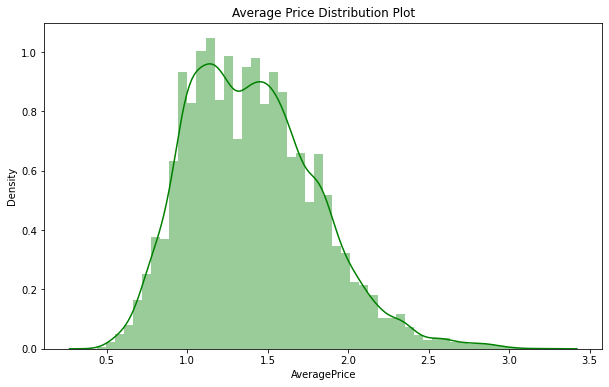

In [27]:
#Visualizing the Target variable

plt.figure(figsize=(10,6))

plt.title('Average Price Distribution Plot')
sns.distplot(data['AveragePrice'],color='Green')

- Average Price data is skewed towards right

- It means there were high fluctuations in price

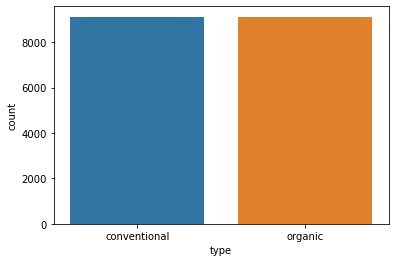

In [28]:
sns.countplot(x='type',data=data)
plt.show()

In [29]:
data['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

- We must say that we have almost equal number of Conventional and Organic Avocados sold
- Conventional Avocado sales are more than Organic Avocados by 3 in number

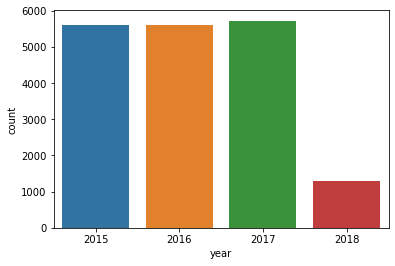

In [30]:
sns.countplot(x='year',data=data)
plt.show()

### Bivariate Analysis

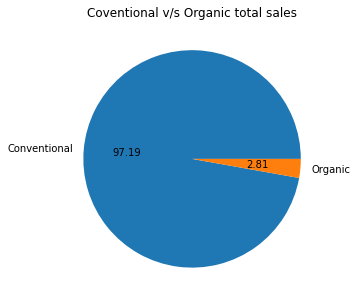

In [31]:
df1 = data.groupby(data['type']).sum()
plt.figure(figsize=(12,5))
plt.pie(df1['Total Volume'],data = df1, labels = ['Conventional','Organic'],autopct="%.2f")
plt.title('Coventional v/s Organic total sales')
plt.show()

Here, 
- 97.19% of Conventional type of Avocado were sold among the total volume of sales
    
- Rest, 2.81% of Organic Avocados were sold
    
#### Conculde: There was a high demand of Conventional Avocados between 2015-2018

<AxesSubplot:title={'center':'Total Avocados sold v/s year'}, xlabel='year', ylabel='Total Volume'>

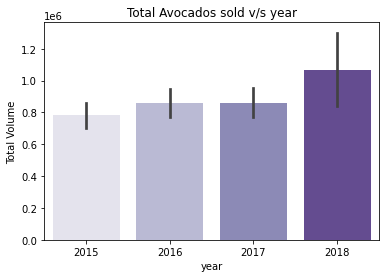

In [32]:
plt.title('Total Avocados sold v/s year')
sns.barplot(x = 'year',y = 'Total Volume',data = data,palette= 'Purples')

- Sales are trending in an increasing order since 2015

- We had more sales in 2018

In [33]:
#Check Year wise the number of avocado sold depending upon the type of Avocado

<AxesSubplot:xlabel='year', ylabel='count'>

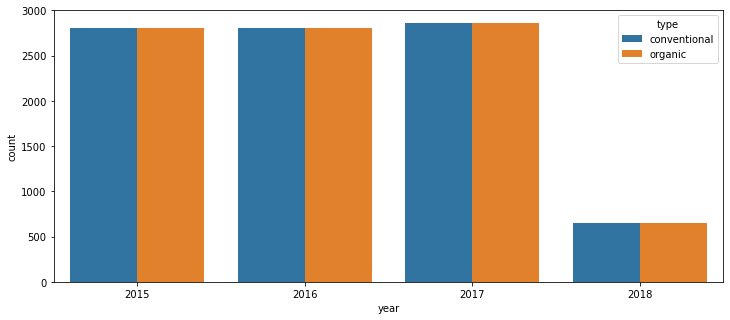

In [34]:
plt.figure(figsize=(12,5))
sns.countplot(x='year', hue='type', data= data)

##### Observation:
- We could see that both the type 'Conventional' and 'Organic' were sold equally and had equal demand between 2015-2018
- Here, there is an increasing trend od sales from 2015 to 2017 and then, a huge fall

    `2017` - had highest demand and sales
    
    `2018` - With a drastic drop, it had lowest demand sales

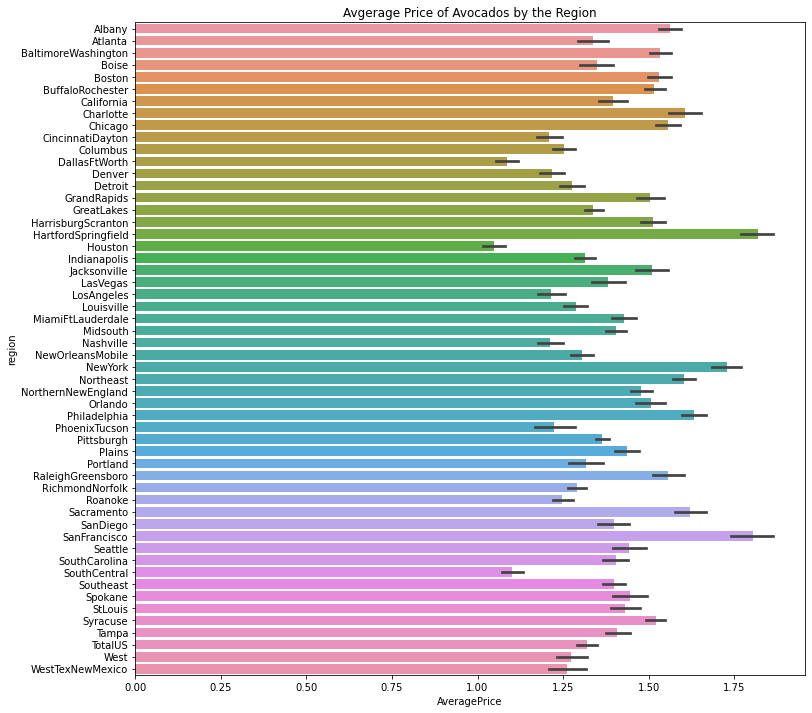

In [35]:
plt.figure(figsize=(12,12))
plt.title("Avgerage Price of Avocados by the Region")
sns.barplot(x="AveragePrice",y="region",data=data)
plt.show()

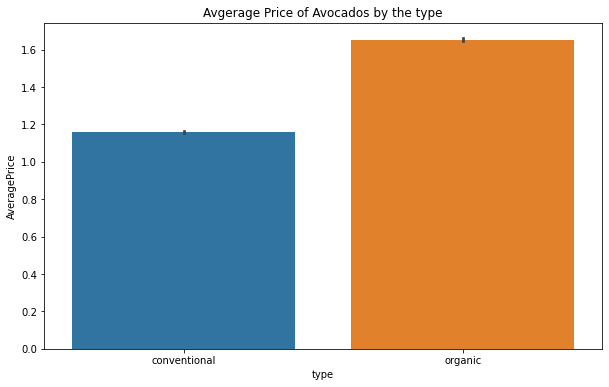

In [36]:
plt.figure(figsize=(10,6))
plt.title("Avgerage Price of Avocados by the type")
sns.barplot(x="type",y="AveragePrice",data=data)
plt.show()

- Average Price is high for Organic Avocados between 2015-2018

### Multivariate Analysis

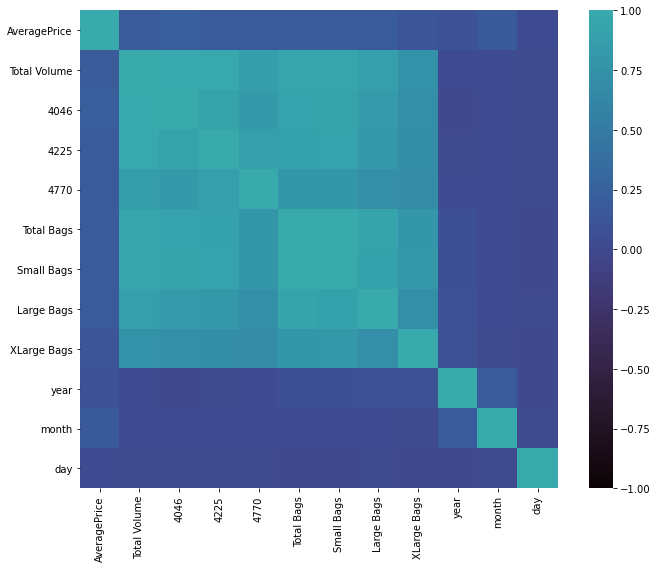

In [37]:
df2 = data.drop(columns=['type','region'])

df2_corr = df2.corr().abs() #to get the correlation values

plt.figure(figsize=(10,8))
sns.heatmap(df2_corr,vmin=-1,vmax=1,annot=False,square=True,center=0.5,fmt='.01g',linecolor='Black',cmap='mako')

plt.tight_layout()

### Outliers

Let's check for Outliers

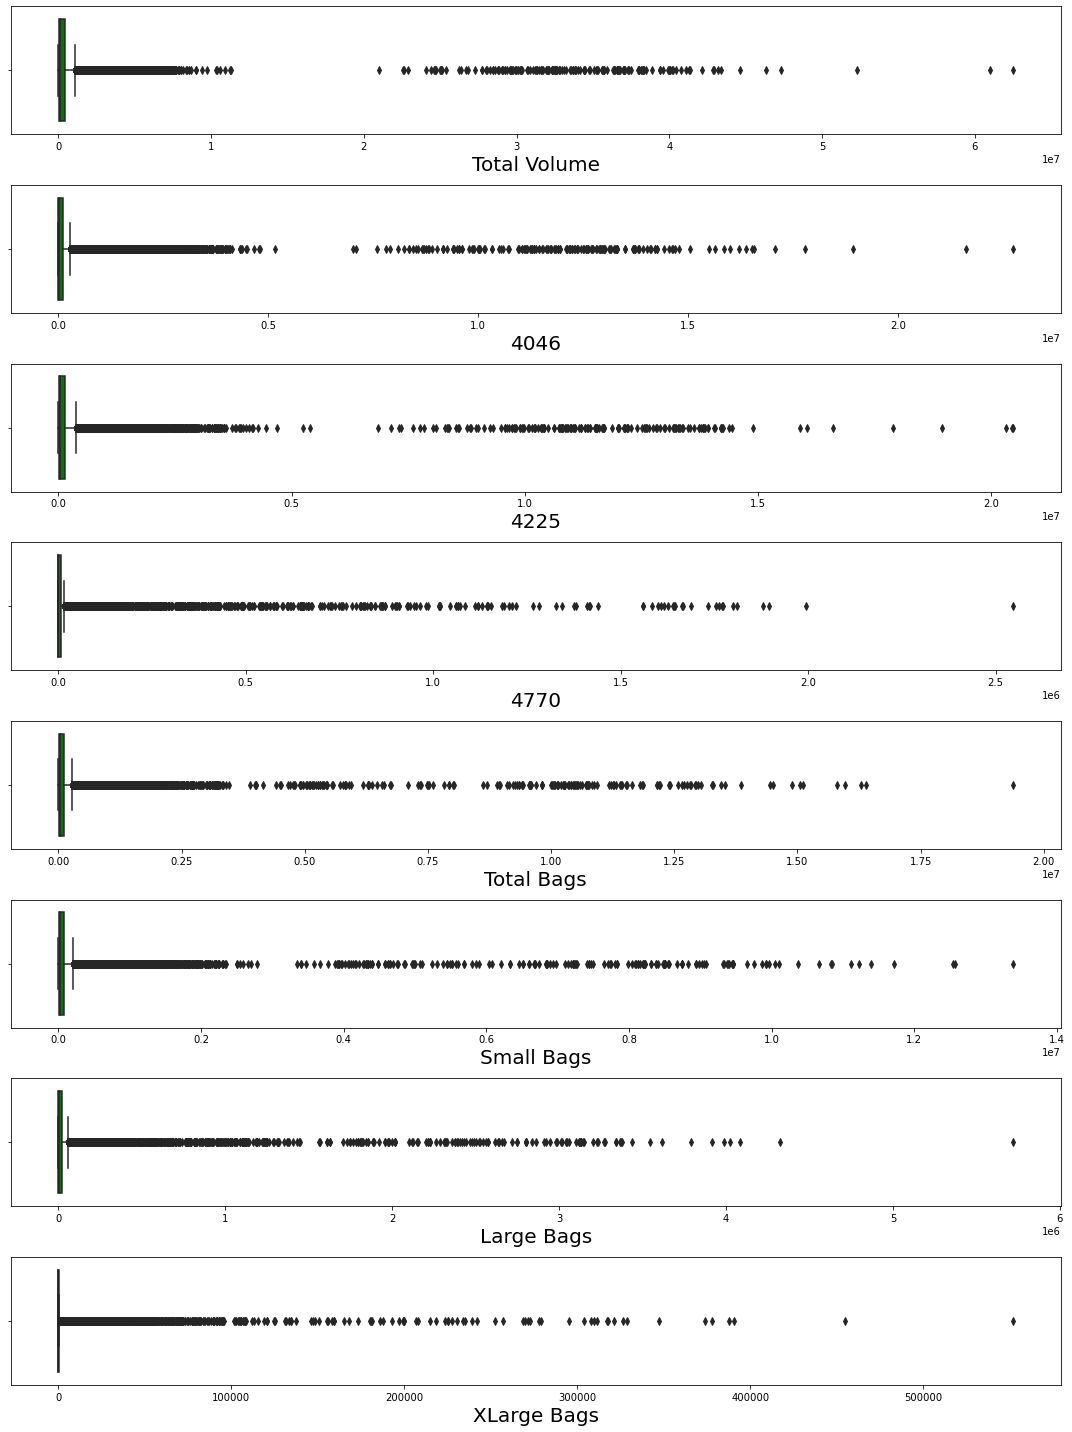

In [38]:
plt.figure(figsize = (15,20))
plotnumber = 1

for column in data.iloc[:,1:9]: #let's visualize only the features columns 
    if plotnumber<=8:
        ax = plt.subplot(8,1,plotnumber)
        sns.boxplot(data[column],color = 'Green')
        plt.xlabel(column,fontsize = 20)
    plotnumber += 1
plt.tight_layout()

In [39]:
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month,day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


### Removing Outlier's and Skewness

In [47]:
data_outliers=data[['Total Volume', '4046', '4225','4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]


In [48]:
Q1 = data_outliers.quantile(0.25)
Q3 = data_outliers.quantile(0.75)
IQR = Q3-Q1

data_new1 = data[~((data_outliers < (Q1-1.5*IQR)) | (data_outliers> (Q3 + 1.5*Q3))).any(axis = 1)]

In [49]:
print('Shape - Before and After:\n')
print('Shape Before'.ljust(20),":",data.shape)
print('Shape After'.ljust(20),":",data_new1.shape)
print('Percentage Loss'.ljust(20),":",((data.shape[0]-data_new1.shape[0])/data.shape[0])*100)

Shape - Before and After:

Shape Before         : (18249, 14)
Shape After          : (11759, 14)
Percentage Loss      : 35.56359252561784


In [50]:
#Let's apply zscore technique

#importing libraries

from scipy.stats import zscore

In [51]:
z=np.abs(zscore(data_outliers))
threshold = 3
data_new2 = data[(z<3).all(axis=1)]
print(np.where(z>3))

(array([ 346,  359,  780, ..., 9111, 9112, 9113], dtype=int64), array([1, 1, 7, ..., 6, 6, 6], dtype=int64))


In [52]:
print('Shape - Before and After:\n')
print('Shape Before'.ljust(20),":",data.shape)
print('Shape After'.ljust(20),":",data_new2.shape)
print('Percentage Loss'.ljust(20),":",((data.shape[0]-data_new2.shape[0])/data.shape[0])*100)

Shape - Before and After:

Shape Before         : (18249, 14)
Shape After          : (17782, 14)
Percentage Loss      : 2.55904433119623


In [53]:
df1 = data_new2.copy()

In [96]:
df = data_new2.copy()

In [97]:
df.skew()

Unnamed: 0      0.112971
AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
year            0.220792
dtype: float64

<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

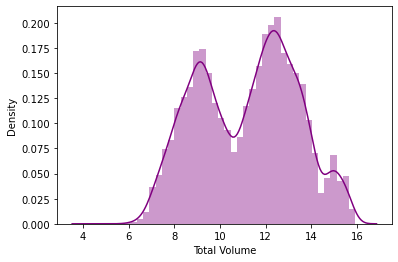

In [98]:
df['Total Volume']=np.log1p(df['Total Volume'])
sns.distplot(df['Total Volume'],color = 'Purple')

<AxesSubplot:xlabel='Large Bags', ylabel='Density'>

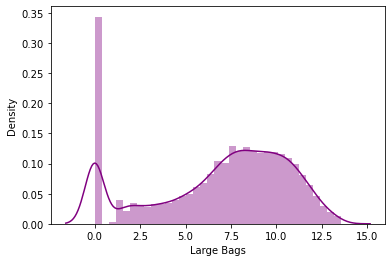

In [99]:
df['Large Bags']=np.log1p(df['Large Bags'])
sns.distplot(df['Large Bags'],color = 'Purple')

<AxesSubplot:xlabel='Small Bags', ylabel='Density'>

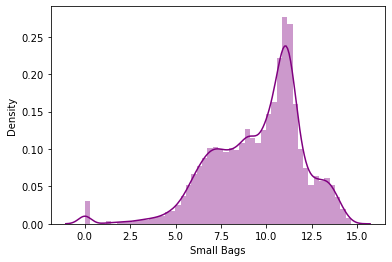

In [100]:
df['Small Bags']=np.log1p(df['Small Bags'])
sns.distplot(df['Small Bags'],color = 'Purple')

<AxesSubplot:xlabel='4046', ylabel='Density'>

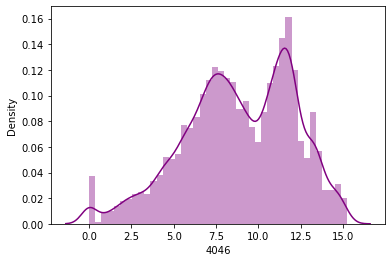

In [101]:
df['4046']=np.log1p(df['4046'])
sns.distplot(df['4046'],color = 'Purple')

<AxesSubplot:xlabel='4225', ylabel='Density'>

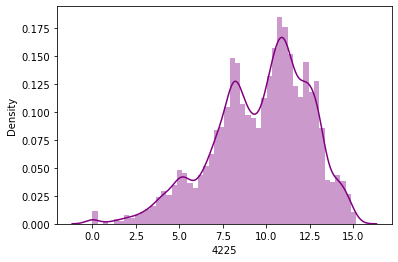

In [102]:
df['4225']=np.log1p(df['4225'])
sns.distplot(df['4225'],color = 'Purple')

<AxesSubplot:xlabel='4770', ylabel='Density'>

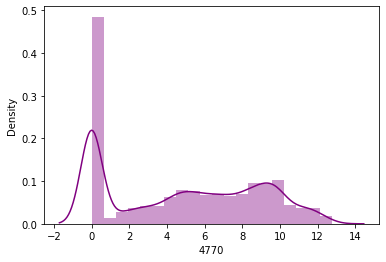

In [103]:
df['4770']=np.log1p(df['4770'])
sns.distplot(df['4770'],color = 'Purple')

In [104]:
df['month'] = pd.DatetimeIndex(df['Date']).month
#df['day'] = pd.DatetimeIndex(df['Date']).day

In [105]:
from sklearn.preprocessing import LabelEncoder
l_enc = LabelEncoder()
df['type'] = l_enc.fit_transform(df['type'])
df['year'] = l_enc.fit_transform(df['year'])

In [106]:
df['region'] = l_enc.fit_transform(df['region'])


In [81]:
region = pd.get_dummies(df.region)
df = pd.concat([df, region], axis='columns')
df.drop('region', axis=1, inplace=True)

In [79]:
df = df.drop(columns = 'region')

In [107]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,0,2015-12-27,1.33,11.070344,6.944801,10.905146,3.895080,8696.87,9.060055,4.545951,0.0,0,0,0,12
1,1,2015-12-20,1.35,10.912867,6.515127,10.706381,4.083115,9505.56,9.149429,4.589955,0.0,0,0,0,12
2,2,2015-12-13,0.93,11.680313,6.679222,11.600485,4.879007,8145.35,8.992584,4.645736,0.0,0,0,0,12
3,3,2015-12-06,1.08,11.277116,7.032624,11.184108,4.298373,5811.16,8.644425,4.903495,0.0,0,0,0,12
4,4,2015-11-29,1.28,10.840377,6.848515,10.688288,4.340944,6183.95,8.697389,5.291746,0.0,0,0,0,11


In [108]:
X = df.drop(columns = ['AveragePrice','Unnamed: 0','Date'])
Y = df['AveragePrice']

In [110]:
X.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,11.070344,6.944801,10.905146,3.895080,8696.87,9.060055,4.545951,0.0,0,0,0,12
1,10.912867,6.515127,10.706381,4.083115,9505.56,9.149429,4.589955,0.0,0,0,0,12
2,11.680313,6.679222,11.600485,4.879007,8145.35,8.992584,4.645736,0.0,0,0,0,12
3,11.277116,7.032624,11.184108,4.298373,5811.16,8.644425,4.903495,0.0,0,0,0,12
4,10.840377,6.848515,10.688288,4.340944,6183.95,8.697389,5.291746,0.0,0,0,0,11


In [111]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

X_scaled = Scaler.fit_transform(X)

In [112]:
from sklearn.linear_model import LinearRegression

maxR2_Score = 0
maxRS = 0

for i in range(200):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,test_size = 0.20,random_state = i)
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    Score = r2_score(y_test,predrf)
    if Score>maxR2_Score:
        maxR2_Score = Score
        maxRS = i
        
print('The best accuracy is ',maxR2_Score, ' with Random State ',maxRS)

The best accuracy is  0.558981463873436  with Random State  159


### Splitting train and test data

In [113]:
from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,test_size = 0.20,random_state = maxRS)

In [94]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet,HuberRegressor,LinearRegression,LogisticRegression,SGDRegressor
from sklearn.metrics import mean_squared_error

In [114]:
# print x_train, y_train

models = [['LineaRegresion: ', LinearRegression()],
          ['Lasso: ', Lasso()],
          ['Ridge: ', Ridge()],
          ['DecisionTree :',DecisionTreeRegressor()],
          ['RandomForest :',RandomForestRegressor()],
          ['KNeighbours :', KNeighborsRegressor()],
          ['SVM :', SVR()],['ElasticNet: ', ElasticNet()]]
          #['AdaBoostClassifier :', AdaBoostRegressor()],
          #['GradientBoostingClassifier: ', GradientBoostingRegressor()],
          #['BayesianRidge: ', BayesianRidge()],
               #['ElasticNet: ', ElasticNet()],
               #['HuberRegressor: ', HuberRegressor()]]

print("Model results!!!\t")

Overall_Score = {}
Overall_Score['Model'] = []
Overall_Score['R2_Score'] = []
Overall_Score['Cross_Val_Score'] = []


for name,model in models:
    model = model
    Overall_Score['Model'].append(model)

    model.fit(x_train, y_train) #train data
    predictions = model.predict(x_test) 
    
    #model name
    print('\n',name,'\n')
    
    #R2_score
    Overall_Score['R2_Score'].append(r2_score(y_test, predictions))
    print('R Squared (R2): ',r2_score(y_test, predictions))
    print('Mean Squared Error (MSE): ',mean_squared_error(y_test,predictions))
    print('Root Mean Squared Error (RMSE): ',np.sqrt(mean_squared_error(y_test, predictions)))
    print('Mean Absolute Error (MAE): ',mean_absolute_error(y_test,predictions))
    
    #Cross validation Score
    Overall_Score['Cross_Val_Score'].append((cross_val_score(model,X,Y,cv=5).mean()))
    print('Cross validation Score: ', cross_val_score(model,X,Y,cv=5).mean())


Model results!!!	

 LineaRegresion:  

R Squared (R2):  0.558981463873436
Mean Squared Error (MSE):  0.07616585852060907
Root Mean Squared Error (RMSE):  0.27598162714320146
Mean Absolute Error (MAE):  0.21487258906187845
Cross validation Score:  0.18569866216140238

 Lasso:  

R Squared (R2):  -7.189580057964662e-07
Mean Squared Error (MSE):  0.17270456237423235
Root Mean Squared Error (RMSE):  0.4155773843392255
Mean Absolute Error (MAE):  0.33474291925671446
Cross validation Score:  -1.0072056526451991

 Ridge:  

R Squared (R2):  0.5589645341484106
Mean Squared Error (MSE):  0.07616878235925859
Root Mean Squared Error (RMSE):  0.2759869242541367
Mean Absolute Error (MAE):  0.21487436906491417
Cross validation Score:  0.18570302534902122

 DecisionTree : 

R Squared (R2):  0.7505269682093197
Mean Squared Error (MSE):  0.04308509980320495
Root Mean Squared Error (RMSE):  0.2075695059569323
Mean Absolute Error (MAE):  0.13480742198481865
Cross validation Score:  -0.3537772044976951

 

In [115]:
Overall_Score = pd.DataFrame(Overall_Score)

In [116]:
Overall_Score['Difference'] = Overall_Score['R2_Score'] - Overall_Score['Cross_Val_Score']

In [117]:
Overall_Score

,Model,R2_Score,Cross_Val_Score,Difference
0,LinearRegression(),5.589815e-01,0.185699,0.373283
1,Lasso(),-7.189580e-07,-1.007206,1.007205
2,Ridge(),5.589645e-01,0.185703,0.373262
3,DecisionTreeRegressor(),7.505270e-01,-0.386722,1.137249
4,"(DecisionTreeRegressor(max_features='auto', ra...",8.852262e-01,0.215820,0.669406
5,KNeighborsRegressor(),8.712617e-01,-0.545190,1.416452
6,SVR(),8.013192e-01,-0.283081,1.084401
7,ElasticNet(),-7.189580e-07,-0.967398,0.967398


In [ ]:
sns.set(font_scale = 1)
data = pd.DataFrame({'Y Test':y_test , 'Pred':predictions},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03],'fit_intercept':[True],'random_state':range(1,10),
              'max_iter':[10,100,1000,10000],'copy_X':[True],}

gridsearch=GridSearchCV(estimator = Lasso(), param_grid = param_grid,scoring='r2',cv=5)     

gridsearch.fit(x_train,y_train)
print(gridsearch.best_score_, gridsearch.best_params_)

In [ ]:
Lasso_final = Lasso(alpha = 0.03, fit_intercept = True, max_iter = 10,copy_X=True,
                    random_state= 1)

Lasso_final.fit(x_train,y_train)

y_pred = Lasso_final.predict(x_test)

### Before Tuning

In [ ]:
data_view1 = pd.DataFrame({'Actual':y_test , 'Predictions':y_pred_Lasso},columns=['Actual','Predictions'])
sns.lmplot(x='Actual',y='Predictions',data=data_view1,palette='rainbow')
data_view1

### After Tuning

In [ ]:
data_view2 = pd.DataFrame({'Y Test':y_test , 'Pred':y_pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data_view2,palette='rainbow')
data_view2